In [7]:
import pandas as pd

In [8]:
df = pd.read_csv(r"/content/data.csv")
df.head()

,Unnamed: 0,link,headline,category,short_description,authors,date
0,0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
category_map = {
    'POLITICS': 'Politics', 'WORLD NEWS': 'Politics', 'THE WORLDPOST': 'Politics', 'WORLDPOST': 'Politics', 'U.S. NEWS': 'Politics',

    'BUSINESS': 'Business', 'MONEY': 'Business',

    'TECH': 'Technology', 'SCIENCE': 'Technology',

    'ENTERTAINMENT': 'Entertainment', 'COMEDY': 'Entertainment', 'ARTS': 'Entertainment', 'ARTS & CULTURE': 'Entertainment', 'CULTURE & ARTS': 'Entertainment',

    'WELLNESS': 'Lifestyle', 'STYLE & BEAUTY': 'Lifestyle', 'STYLE': 'Lifestyle', 'TRAVEL': 'Lifestyle', 'FOOD & DRINK': 'Lifestyle',
    'HOME & LIVING': 'Lifestyle', 'WEDDINGS': 'Lifestyle', 'TASTE': 'Lifestyle', 'HEALTHY LIVING': 'Lifestyle',
    'GOOD NEWS': 'Lifestyle', 'GREEN': 'Lifestyle', 'ENVIRONMENT': 'Lifestyle', 'DIVORCE': 'Lifestyle', 'FIFTY': 'Lifestyle',

    'BLACK VOICES': 'Social Issues', 'QUEER VOICES': 'Social Issues', 'IMPACT': 'Social Issues',
    'LATINO VOICES': 'Social Issues', 'RELIGION': 'Social Issues', 'WOMEN': 'Social Issues',

    'PARENTING': 'Parenting', 'PARENTS': 'Parenting',

    'EDUCATION': 'Education', 'COLLEGE': 'Education',

    'SPORTS': 'Sports',

    'CRIME': 'Crime/Weird', 'WEIRD NEWS': 'Crime/Weird', 'MEDIA': 'Crime/Weird'
}

df['broad_category'] = df['category'].map(category_map)
df = df[df['broad_category'].notna()]

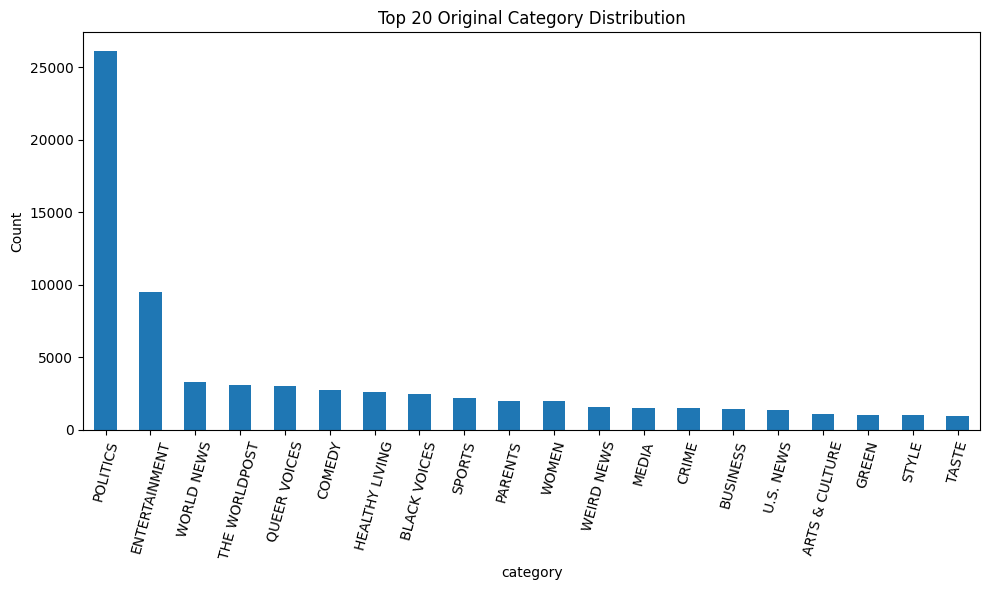

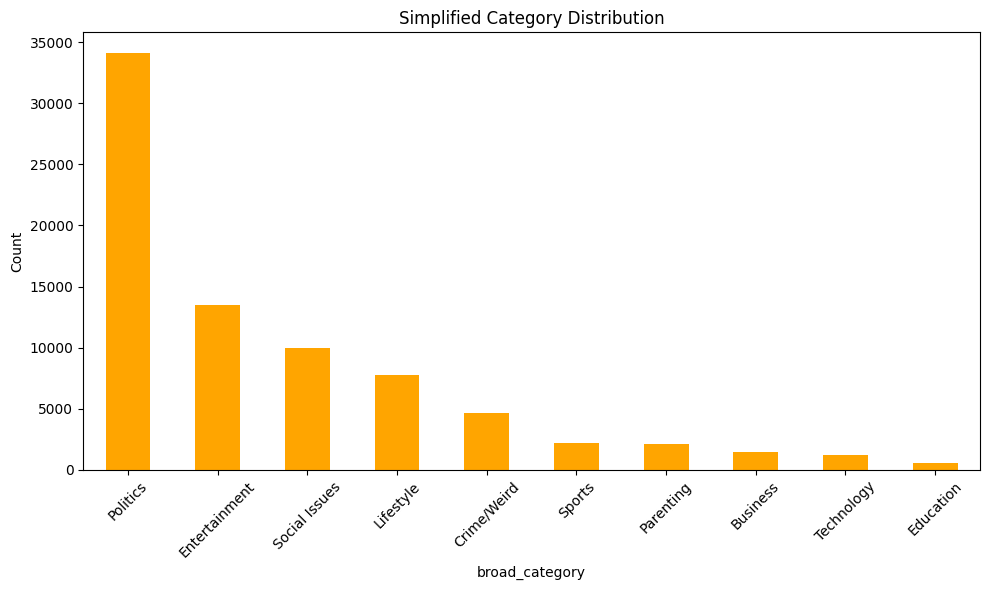

In [30]:
# Before
plt.figure(figsize=(10,6))
df['category'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Original Category Distribution")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

# After
plt.figure(figsize=(10,6))
df['broad_category'].value_counts().plot(kind='bar', color='orange')
plt.title("Simplified Category Distribution")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
df['text'] = df['headline'].fillna('') + ' ' + df['short_description'].fillna('') + ' ' + df['authors'].fillna('')

In [11]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [12]:
def preprocess(text):
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and not token.like_num and token.is_alpha
    ]
    return " ".join(tokens)

In [13]:
df['clean_text'] = df['text'].apply(preprocess)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X = tfidf.fit_transform(df['clean_text'])

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['broad_category'])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names = label_encoder.classes_))

               precision    recall  f1-score   support

     Business       0.71      0.33      0.45       279
  Crime/Weird       0.63      0.49      0.55       929
    Education       0.67      0.36      0.47       137
Entertainment       0.83      0.86      0.84      2732
    Lifestyle       0.75      0.71      0.73      1538
    Parenting       0.82      0.71      0.77       402
     Politics       0.82      0.93      0.87      6734
Social Issues       0.77      0.69      0.73      2044
       Sports       0.78      0.57      0.65       456
   Technology       0.76      0.39      0.51       259

     accuracy                           0.80     15510
    macro avg       0.75      0.61      0.66     15510
 weighted avg       0.79      0.80      0.79     15510



In [26]:
print(confusion_matrix(y_test, y_pred))

[[  93    5    0    7   35    3  112   11    0   13]
 [   4  453    1  103   37    5  283   31    9    3]
 [   1    0   50    1   14    0   56   14    1    0]
 [   2   48    1 2351   39    3  176   86   24    2]
 [   8   36    3   84 1098   29  210   66    2    2]
 [   1    2    1   17   40  287   24   29    1    0]
 [  10  100   10   74   83    3 6288  136   20   10]
 [   6   35    9  122   70   16  352 1416   17    1]
 [   0   15    0   62   12    2   83   24  258    0]
 [   6   20    0   12   45    0   61   15    0  100]]


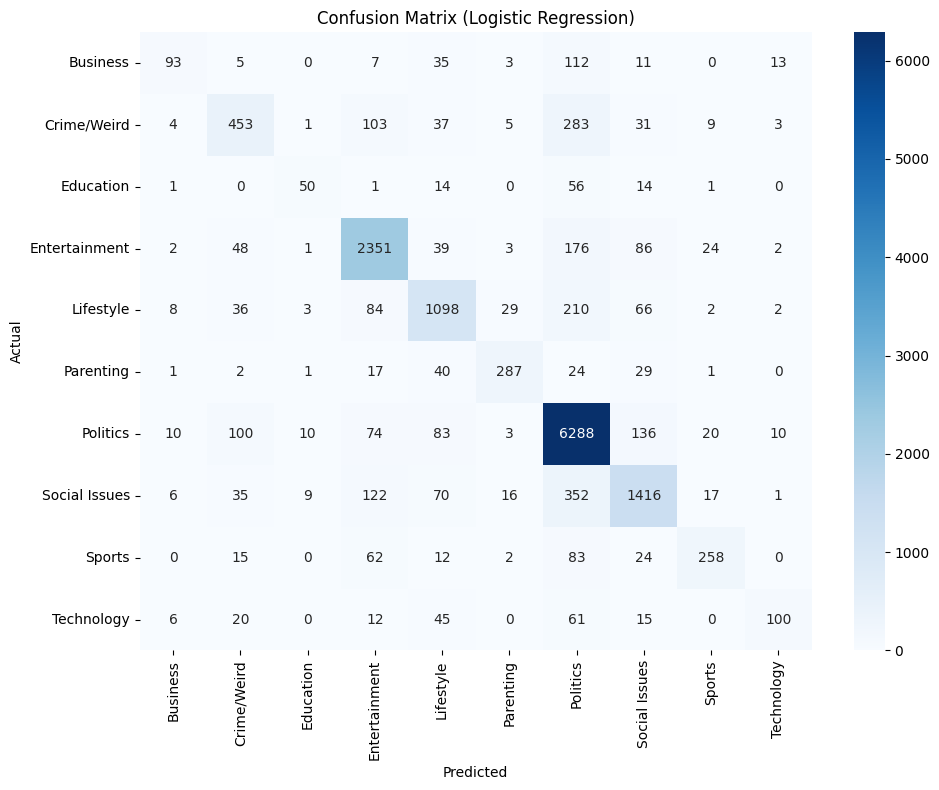

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [43]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred_nb = model.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.80      0.14      0.24       279
           1       0.66      0.34      0.45       929
           2       0.88      0.16      0.27       137
           3       0.75      0.89      0.81      2732
           4       0.75      0.67      0.71      1538
           5       0.92      0.58      0.71       402
           6       0.78      0.94      0.85      6734
           7       0.74      0.64      0.68      2044
           8       0.87      0.43      0.58       456
           9       0.95      0.16      0.27       259

    accuracy                           0.77     15510
   macro avg       0.81      0.50      0.56     15510
weighted avg       0.77      0.77      0.75     15510



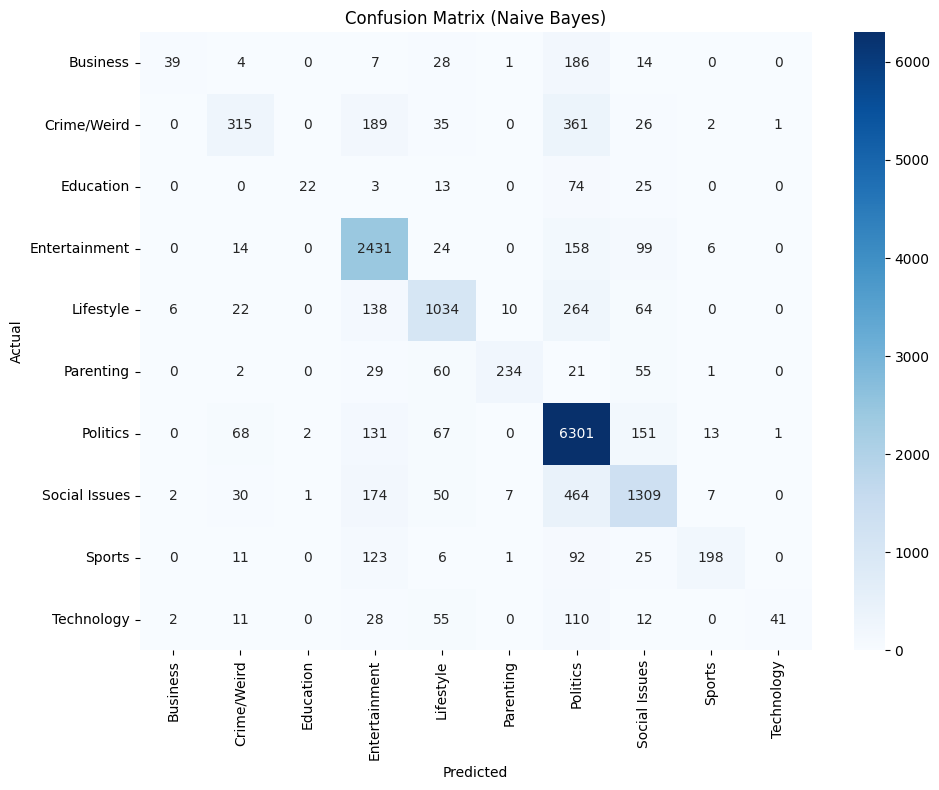

In [44]:
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [45]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.59      0.41      0.48       279
           1       0.62      0.52      0.57       929
           2       0.65      0.45      0.53       137
           3       0.84      0.86      0.85      2732
           4       0.73      0.72      0.72      1538
           5       0.75      0.76      0.75       402
           6       0.85      0.91      0.88      6734
           7       0.75      0.70      0.72      2044
           8       0.74      0.70      0.72       456
           9       0.66      0.49      0.56       259

    accuracy                           0.80     15510
   macro avg       0.72      0.65      0.68     15510
weighted avg       0.80      0.80      0.80     15510



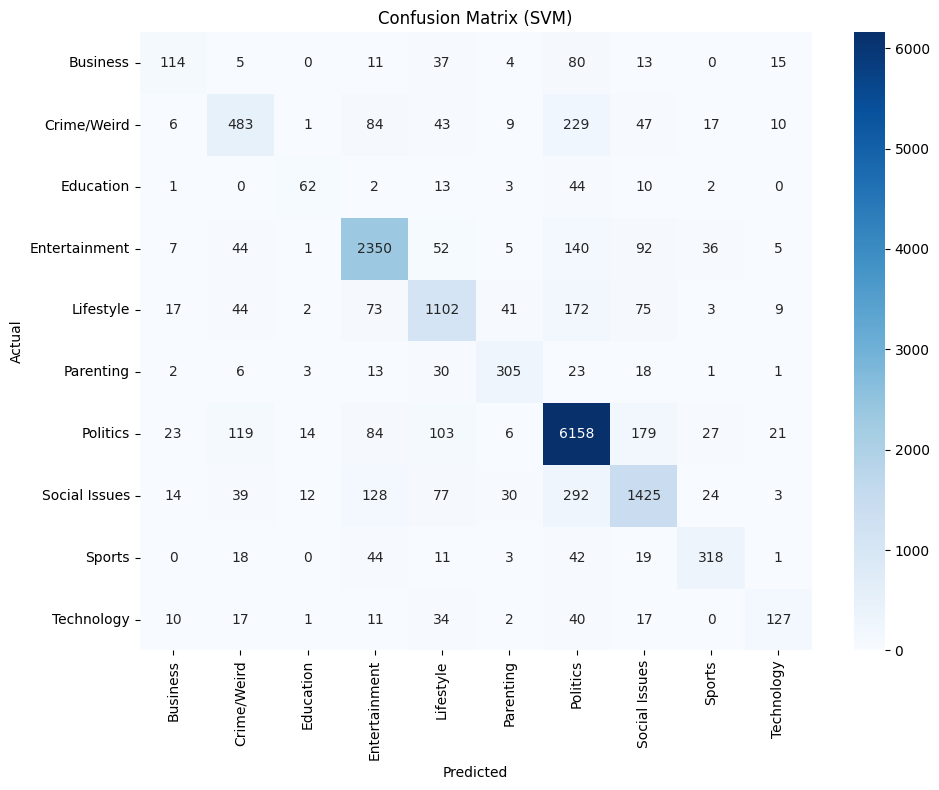

In [46]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [47]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:50:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.67      0.38      0.48       279
           1       0.63      0.42      0.50       929
           2       0.57      0.40      0.47       137
           3       0.82      0.81      0.82      2732
           4       0.79      0.58      0.67      1538
           5       0.78      0.74      0.76       402
           6       0.75      0.94      0.83      6734
           7       0.81      0.61      0.69      2044
           8       0.72      0.55      0.62       456
           9       0.71      0.44      0.54       259

    accuracy                           0.76     15510
   macro avg       0.73      0.59      0.64     15510
weighted avg       0.76      0.76      0.75     15510



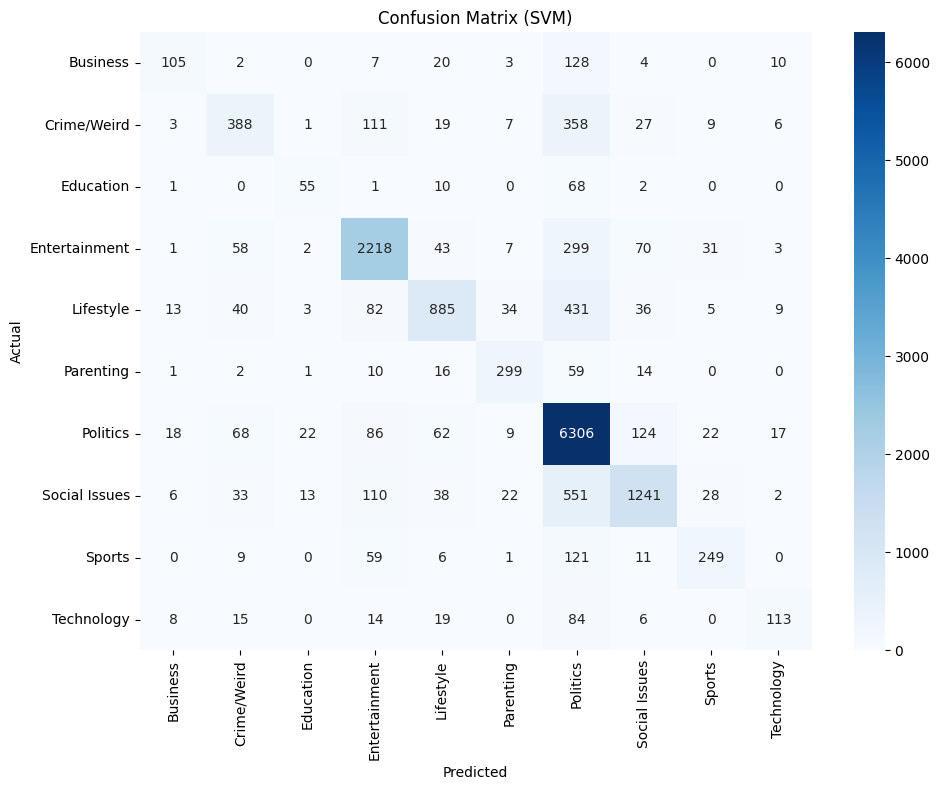

In [49]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()